In [4]:
%pip install pandas matplotlib

  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("data.csv")

In [21]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=np.array(data)
m, n= data.shape # m: örnek sayısı, n: özellik sayısı
np.random.shuffle(data) #verileri karıştırma

data_dev=data[0:1000].T # ilk 1000 örnek doğrulama seti
Y_dev=data_dev[0] # etiketler
X_dev=data_dev[1:n] # özellikler
X_dev = X_dev / 255. # 0-1 arası ölçeklendirme

data_train=data[1000:m].T # kalan örnekler eğitim seti
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

(784, 59000)


In [18]:
def init_params(): # Ağırlık ve biasları başlatma
    w1=np.random.rand(10,784)-0.5 #10 sınıf 784 pixel
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1, b1, w2, b2

In [1]:
w1,b1, w2, b2 = init_params()

NameError: name 'init_params' is not defined

In [ ]:
def ReLU(Z): # ReLU aktivasyon fonksiyonu
    return np.maximum(Z, 0) # 0'dan küçük değerleri 0 yapar

In [ ]:
def softmax(Z): # Softmax aktivasyon fonksiyonu
    A=np.exp(Z) / sum(np.exp(Z)) # Her bir değeri exp ile alıp toplamına bölüyoruz
    return A # Böylece değerler 0-1 arasında olur ve toplamları 1 olur her zaman

In [ ]:
def forward_prop(w1, b1, w2, b2, X): # İleri yayılım
    z1=w1.dot(X)+b1
    a1=ReLU(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1, a1, z2, a2

In [ ]:
def one_hot(Y): # encode işlemi
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [19]:
def deriv_ReLU(Z):
    return Z>0

In [2]:
def back_prop(z1, a1, z2, a2, w2, Y, X):
    OneHot_Y=one_hot(Y)
    dZ2=a2-OneHot_Y
    dW2=1/m * dZ2.dot(a1.T)
    db2=1/m * np.sum(dZ2)
    dZ1=w2.T.dot(dZ2)*deriv_ReLU(z1)
    dW1=1/m * dZ1.dot(X.T)
    db1=1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [21]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(a2):
    return np.argmax(a2,0) # Her sütundaki en büyük değerin indeksini döner

In [23]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

In [24]:
def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2=init_params()
    for i in range(iterations):
        z1, a1, z2, a2 =forward_prop(w1, b1, w2, b2, X)
        dW1, db1, dW2, db2 = back_prop(z1, a1, z2, a2, w2, Y, X)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)
        if i%10==0:
            print("iterations: ",i)
            print("accuracy: ",get_accuracy(get_predictions(a2),Y))
    return w1, b1, w2, b2

In [25]:
w1, b1, w2, b2=gradient_descent(X_train, Y_train, 200, 0.1)

iterations:  0
[2 7 1 ... 1 2 2] [9 0 5 ... 7 1 7]
accuracy:  0.08869491525423728
iterations:  10
[2 6 1 ... 1 8 2] [9 0 5 ... 7 1 7]
accuracy:  0.15927118644067798
iterations:  20
[2 6 1 ... 1 8 7] [9 0 5 ... 7 1 7]
accuracy:  0.22161016949152543
iterations:  30
[9 6 1 ... 7 1 9] [9 0 5 ... 7 1 7]
accuracy:  0.278
iterations:  40
[9 6 6 ... 7 1 9] [9 0 5 ... 7 1 7]
accuracy:  0.31703389830508477
iterations:  50
[9 8 6 ... 7 1 7] [9 0 5 ... 7 1 7]
accuracy:  0.3625254237288136
iterations:  60
[9 8 6 ... 7 1 7] [9 0 5 ... 7 1 7]
accuracy:  0.42647457627118646
iterations:  70
[9 0 6 ... 7 1 7] [9 0 5 ... 7 1 7]
accuracy:  0.4854915254237288
iterations:  80
[9 0 6 ... 7 8 7] [9 0 5 ... 7 1 7]
accuracy:  0.531135593220339
iterations:  90
[9 0 6 ... 7 1 7] [9 0 5 ... 7 1 7]
accuracy:  0.5707627118644067
iterations:  100
[9 0 6 ... 7 1 7] [9 0 5 ... 7 1 7]
accuracy:  0.6047796610169491
iterations:  110
[9 0 6 ... 7 1 7] [9 0 5 ... 7 1 7]
accuracy:  0.6328305084745762
iterations:  120
[9 0 6 

In [26]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [27]:
def test_prediction(index, w1, b1,w2,b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1,b1,w2,b2)
    label = Y_train[index]

    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Prediction:  [7]
Label:  4


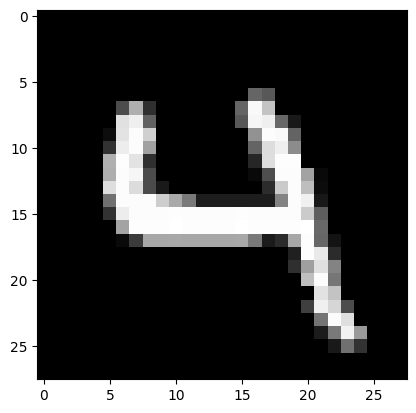

Prediction:  [9]
Label:  9


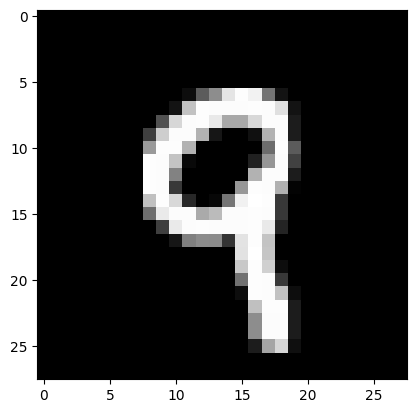

Prediction:  [9]
Label:  9


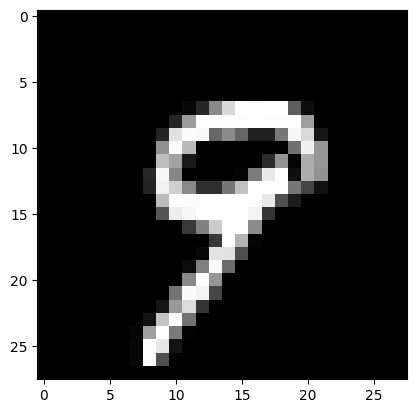

Prediction:  [1]
Label:  1


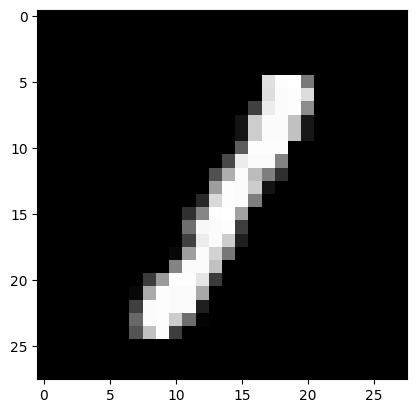

In [32]:
test_prediction(0, w1,b1,w2,b2)
test_prediction(1, w1,b1,w2,b2)
test_prediction(2, w1,b1,w2,b2)
test_prediction(3, w1,b1,w2,b2)

In [29]:
dev_predictions = make_predictions(X_dev, w1,b1,w2,b2)
get_accuracy(dev_predictions, Y_dev)

[3 3 5 3 6 0 4 8 8 1 4 7 3 9 5 9 0 6 9 1 8 0 2 0 0 9 7 8 1 0 8 3 9 9 1 2 1
 9 0 2 0 6 8 4 3 7 1 6 3 2 6 2 7 3 8 4 1 3 7 8 2 8 3 3 0 6 8 8 9 1 2 7 3 5
 6 2 1 8 2 0 4 1 4 7 6 7 4 8 4 3 9 1 7 1 9 8 8 2 8 7 9 3 0 2 9 6 3 6 8 3 3
 5 8 9 4 2 7 7 5 8 4 9 6 9 4 4 4 4 7 6 7 6 9 7 0 0 3 7 9 8 0 6 8 7 1 7 3 4
 9 4 4 9 1 9 7 1 9 0 6 0 0 8 9 5 2 6 4 8 9 0 0 2 9 8 6 8 3 0 2 0 8 6 3 0 1
 6 5 1 8 5 9 2 7 6 9 8 4 8 2 3 8 8 5 2 8 8 1 8 6 6 6 9 0 1 9 1 0 9 7 2 0 9
 3 5 3 9 3 8 7 7 0 1 8 9 2 6 8 0 4 8 9 2 8 1 9 7 8 4 1 6 2 1 8 8 7 0 2 9 8
 3 5 8 4 8 9 9 4 4 6 7 9 3 7 0 6 7 7 8 9 1 4 5 1 3 8 1 9 2 7 0 6 3 8 7 6 0
 3 8 9 3 0 8 0 4 6 7 6 7 1 8 7 1 0 9 9 9 9 1 9 4 6 7 8 2 1 2 6 4 0 8 3 3 7
 1 1 4 3 9 5 3 3 9 9 1 2 4 4 3 7 3 1 5 8 7 0 1 6 3 9 7 8 6 7 6 0 1 9 6 4 8
 1 9 8 6 6 8 9 7 6 7 3 8 8 2 2 8 0 9 8 0 6 2 1 1 8 6 2 2 2 7 9 9 1 6 6 6 8
 4 1 0 0 5 4 7 1 9 9 9 1 7 0 1 7 6 9 2 8 0 7 1 4 5 7 8 8 3 9 6 8 9 6 8 3 1
 3 6 2 4 8 1 8 7 9 8 1 3 1 7 6 6 1 6 1 6 0 8 5 0 1 0 7 4 3 8 0 0 8 2 3 2 1
 4 7 2 2 4 2 2 3 3 0 6 1 

np.float64(0.792)